In [1]:
import numpy as np
import pandas as pd

In [3]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


We can start to understand this data a bit more by using a pivot table.

Let’s add a decade column, and take a look at male and female births as a function of decade

In [14]:
births['decade'] = 10 * (births['year'] // 10)
a = births.pivot_table('births', 'decade', 'gender', aggfunc = 'sum')
a

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade.
To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year

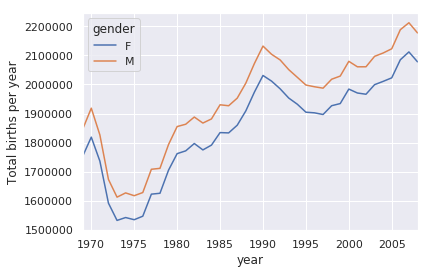

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc=sum).plot()
plt.ylabel('Total births per year');

### Further data exploration:
    Though this doesn’t necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point.
    We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th).
    One easy way to remove these all at once is to cut outliers; we’ll do this via a robust sigma-clipping operation.
    This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution.
    With this we can use the query() method to filter out rows with births outside these values.

In [27]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

Next we set the day column to integers; previously it had been a string because some
columns in the dataset contained the value 'null

In [28]:
births['day'] = births['day'].astype(int)

Finally, we can combine the day, month, and year to create a Date index.
This allows us to quickly compute the weekday corresponding to each row.

In [30]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

Using this we can plot births by weekday for several decades

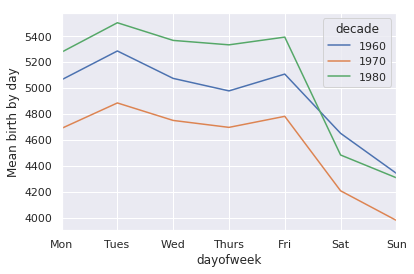

In [36]:
births.pivot_table('births', index='dayofweek', columns= 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Mean birth by day');

Apparently births are slightly less common on weekends than on weekdays! Note that
the 1990s and 2000s are missing because the CDC data contains only the month of
birth starting in 1989.

Another interesting view is to plot the mean number of births by the day of the year.
Let’s first group the data by month and day separately.

In [37]:
births_by_date = births.pivot_table('births', births.index.month, births.index.day)
births_by_date

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
1,4009.225,4247.400,4500.900,4571.350,4603.625,4668.150,4706.925,4629.650,4537.775,4591.700,...,4742.800,4666.750,4653.200,4698.000,4715.900,4747.025,4771.800,4702.300,4644.225,4598.275
2,4661.450,4743.025,4761.825,4760.825,4728.300,4678.100,4649.650,4668.525,4713.575,4800.850,...,4751.525,4757.450,4829.000,4857.025,4790.575,4693.750,4695.300,4623.400,NaN,NaN
3,4742.175,4750.550,4871.775,4821.550,4781.600,4721.875,4722.450,4718.225,4692.075,4785.375,...,4667.200,4697.200,4725.050,4773.650,4722.825,4680.850,4694.650,4665.025,4663.425,4723.250
4,4623.825,4743.825,4652.925,4679.525,4586.825,4642.850,4689.850,4712.025,4649.875,4610.675,...,4686.700,4643.725,4581.150,4602.250,4588.500,4571.950,4656.550,4613.250,4615.100,NaN
5,4651.275,4616.700,4570.225,4577.000,4687.300,4678.950,4658.950,4623.750,4608.850,4623.175,...,4713.500,4721.100,4689.125,4661.925,4657.750,4738.150,4671.650,4704.050,4601.175,4597.050
6,4751.475,4804.650,4783.275,4744.475,4706.875,4771.850,4681.050,4681.950,4784.275,4831.375,...,4795.625,4850.550,4897.525,4890.925,4853.975,4852.325,4862.975,4881.650,4981.600,NaN
7,5021.975,5021.450,4869.425,4335.325,4698.825,4984.500,5153.425,5159.800,5075.400,5041.300,...,5135.675,5092.275,5036.050,5029.325,4998.700,5070.250,5133.525,5151.900,5101.225,5045.275
8,5068.000,5008.525,5065.250,5087.950,5108.000,5110.925,5082.675,5153.575,5027.775,5083.375,...,5058.850,5007.050,5035.200,5107.675,5167.500,5124.700,5099.775,5062.000,5027.850,5048.650
9,4908.325,4982.000,5003.925,5013.400,4954.600,4955.000,4995.450,5165.475,5263.400,5214.500,...,5316.825,5320.425,5284.050,5240.000,5250.650,5190.150,5168.450,5218.825,5224.775,NaN
10,5167.325,5103.625,5067.375,5005.175,5025.075,5048.100,5024.100,4989.875,4945.425,4975.975,...,4810.250,4755.500,4758.775,4744.350,4788.050,4821.350,4826.100,4775.575,4745.050,4662.800


The result is a multi-index over months and days.
To make this easily plottable, let’s turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

In [47]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date

TypeError: cannot unpack non-iterable int object